# KL divergence NMF (KLNMF) SCIPI

## Example: larger size synthetic data

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Load Sourcecode

In [2]:
from src import klnmf

### Set Random Seed

In [3]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)

our seed is 20230810


### Set Size

In [4]:
n = 2000
m = 1000
k = 20
our_dtype = 'float32'

V_orig = np.random.randn(n,m).astype(our_dtype)
V_orig = (V_orig - 0.5) * (V_orig > 0.5)
V_orig = V_orig / V_orig.sum().sum() * k

In [5]:
# We resize the scale of V_orig.
# This is not requirede but to ease the objective calculation.
# V_orig is our target matrix to be decomposed

In [6]:
print(f"size of V: {V_orig.shape}")

size of V: (2000, 1000)


### Our matrix to be decomposed

In [7]:
V_orig[:4,:4]

array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  1.2624989e-05],
       [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00,  2.7851554e-05, -0.0000000e+00, -0.0000000e+00],
       [ 4.9286558e-05, -0.0000000e+00, -0.0000000e+00, -0.0000000e+00]],
      dtype=float32)

### Initialization

In [8]:
W_mat, H_mat, A_mat = klnmf.init_klnmf(V_orig, k, seed = 1, our_dtype = our_dtype)

In [9]:
# we will use the same initialization for all the method
# the above function `init_klnmf` provies 1-step MU initialization from random matrix
# please see the manuscript for details

### Run Methods

#### MU (Multiplicatsive Updates)

In [10]:
res_mu = klnmf.run_mu(V_orig, k)

init: obj 70.693349160655
round 50: obj 69.32154969166086
round 100: obj 69.11789444874094
round 150: obj 69.04753807972239
round 200: obj 69.01147393177317
round 250: obj 68.98928955982493
round 300: obj 68.97454956959055
round 350: obj 68.96428612659739
round 400: obj 68.95641259144114
round 450: obj 68.94997910450266
round 500: obj 68.94442490528391
round 550: obj 68.93934754322336
round 600: obj 68.93495682667063
round 650: obj 68.93099526356028
round 700: obj 68.92755631397532
round 750: obj 68.92440918873118
round 800: obj 68.92150811146067
round 850: obj 68.91882637928293
round 900: obj 68.91634491871164
round 950: obj 68.91403511951731
round 1000: obj 68.91181878040598


In [11]:
res_mu_with_normalize = klnmf.run_mu_with_normalize(V_orig, k)

init: obj 70.693349160655
round 50: obj 69.3217614073591
round 100: obj 69.1181481261091
round 150: obj 69.04789093921946
round 200: obj 69.01178292225168
round 250: obj 68.98950509022043
round 300: obj 68.9747212309675
round 350: obj 68.9644730467634
round 400: obj 68.9566491026716
round 450: obj 68.95017174671457
round 500: obj 68.94460038135813
round 550: obj 68.93962410877512
round 600: obj 68.93517807911203
round 650: obj 68.93124512623118
round 700: obj 68.92777756641672
round 750: obj 68.92459992359446
round 800: obj 68.92172554920481
round 850: obj 68.91911820362375
round 900: obj 68.91668633411692
round 950: obj 68.91446808765696
round 1000: obj 68.9123604674177


In [12]:
# run_mu is running mu without rescaling every round
# run_mu_with_normalize is running mu with rescaling every round
# they are visually the same
# however one is a little slower due to rescaling
# the other is a little numerically instable
# however for this example they are nearly identical

#### SCIPI (Scale Invariant Power Iteration)

In [13]:
res_scipi = klnmf.run_scipi(V_orig, k)

init: obj 70.693349160655
round 50: obj 69.11270646045969
round 100: obj 69.00750473926828
round 150: obj 68.97172097156809
round 200: obj 68.95417908619211
round 250: obj 68.94219902942942
round 300: obj 68.9327233214216
round 350: obj 68.92536095569895
round 400: obj 68.91953019092844
round 450: obj 68.91459969471262
round 500: obj 68.91046074817942
round 550: obj 68.90681199024485
round 600: obj 68.90370682667063
round 650: obj 68.90104416797922
round 700: obj 68.89863900135325
round 750: obj 68.89644173572825
round 800: obj 68.89458397815989
round 850: obj 68.89276055286692
round 900: obj 68.89114502857493
round 950: obj 68.88973740528391
round 1000: obj 68.88855484913157


#### PGD (Projected Gradient Descent)

In [14]:
res_pgd = klnmf.run_pgd(V_orig, k, stepsize = 1.5)

init: obj 70.693349160655
round 50: obj 69.1844265837507
round 100: obj 69.04577378223703
round 150: obj 68.99773720691965
round 200: obj 68.97352532337473
round 250: obj 68.95934800098703
round 300: obj 68.94932297657297
round 350: obj 68.94115189503
round 400: obj 68.93423394153879
round 450: obj 68.92844895313547
round 500: obj 68.92365387867258
round 550: obj 68.91954354236887
round 600: obj 68.91587380359934
round 650: obj 68.91274193714426
round 700: obj 68.90964058826731
round 750: obj 68.90701989124582
round 800: obj 68.90474823902414
round 850: obj 68.90275124500559
round 900: obj 68.90063218067453
round 950: obj 68.89876679371164
round 1000: obj 68.89717415760325


In [15]:
res_pgd2 = klnmf.run_pgd(V_orig, k, stepsize = 0.5)

init: obj 70.693349160655
round 50: obj 69.70721939991282
round 100: obj 69.32241944263743
round 150: obj 69.18838623951243
round 200: obj 69.12004593799875
round 250: obj 69.07790306995676
round 300: obj 69.04933670948313
round 350: obj 69.02880600879953
round 400: obj 69.01299599598215
round 450: obj 69.00054863880442
round 500: obj 68.99057702015207
round 550: obj 68.98235062549875
round 600: obj 68.97558907459543
round 650: obj 68.96990708301828
round 700: obj 68.96510437916086
round 750: obj 68.96087578724192
round 800: obj 68.95706681202219
round 850: obj 68.95366982410715
round 900: obj 68.95052079151438
round 950: obj 68.94762352894114
round 1000: obj 68.94497612903879


In [16]:
res_pgd_with_linesearch = klnmf.run_pgd_with_linesearch(V_orig, k)

init: obj 70.693349160655
round 50: obj 69.21743515919016
round 100: obj 69.06611374805735
round 150: obj 69.01235703419016
round 200: obj 68.98454026172922
round 250: obj 68.96720627735422
round 300: obj 68.95503548572825
round 350: obj 68.94597176502512
round 400: obj 68.93883637378977
round 450: obj 68.93316773365305
round 500: obj 68.92833832691477
round 550: obj 68.92426804493235
round 600: obj 68.92081574390696
round 650: obj 68.91789940784739
round 700: obj 68.91532257984446
round 750: obj 68.91298989246653
round 800: obj 68.91076401661203
round 850: obj 68.90875176380442
round 900: obj 68.90697983692453
round 950: obj 68.9055245299177
round 1000: obj 68.90424279163645


### Plotting

#### Original plot

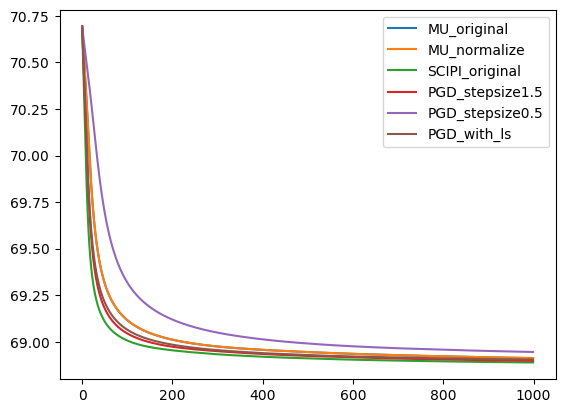

In [17]:
import matplotlib.pyplot as plt
plt.plot(res_mu[3])
plt.plot(res_mu_with_normalize[3])
plt.plot(res_scipi[3])
plt.plot(res_pgd[3])
plt.plot(res_pgd2[3])
plt.plot(res_pgd_with_linesearch[3])
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize1.5", "PGD_stepsize0.5", "PGD_with_ls"])

#### Zoomed in

(0.0, 1000.0)

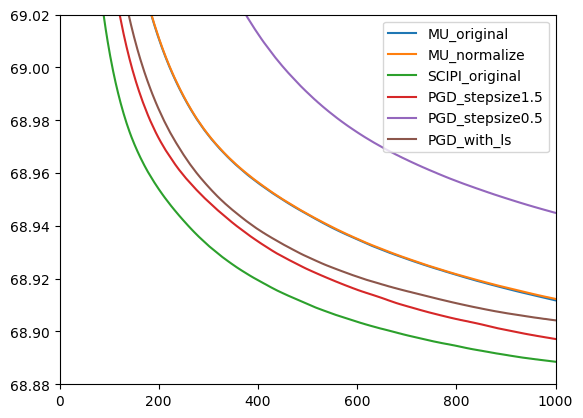

In [18]:
import matplotlib.pyplot as plt
plt.plot(res_mu[3])
plt.plot(res_mu_with_normalize[3])
plt.plot(res_scipi[3])
plt.plot(res_pgd[3])
plt.plot(res_pgd2[3])
plt.plot(res_pgd_with_linesearch[3])
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize1.5", "PGD_stepsize0.5", "PGD_with_ls"])
plt.ylim([68.88, 69.02])
plt.xlim([0000,1000])

#### Relative Error

In [19]:
# get relative error

In [20]:
eps = 1e-8
W, H, A = klnmf.init_klnmf(V_orig, k, eps = eps)
obj_intercept = k * np.log(k) - k + 1
A = V_orig / (W @ H)
init_obj = obj_intercept + (V_orig * np.log(A + eps)).sum().sum()
res_min = np.min(np.concatenate([res_mu[3], res_mu_with_normalize[3], res_scipi[3], res_pgd[3], res_pgd2[3], res_pgd_with_linesearch[3]]))
def get_rel(res):
    return (res - res_min) / (init_obj - res_min)

In [21]:
rel_mu = get_rel(res_mu[3])
rel_mu_with_normalize = get_rel(res_mu_with_normalize[3])
rel_scipi = get_rel(res_scipi[3])
rel_pgd = get_rel(res_pgd[3])
rel_pgd2 = get_rel(res_pgd2[3])
rel_pgd_with_linesearch = get_rel(res_pgd_with_linesearch[3])

(0.0, 1000.0)

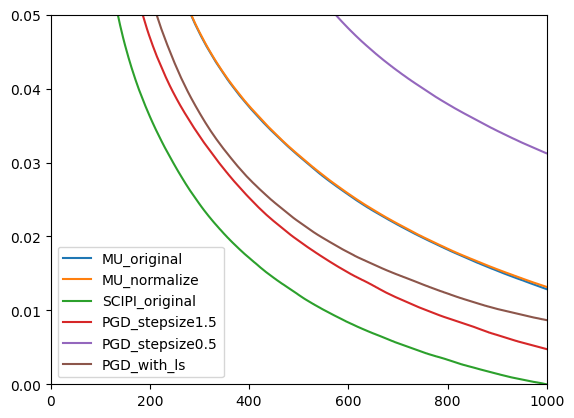

In [22]:
import matplotlib.pyplot as plt
plt.plot(rel_mu)
plt.plot(rel_mu_with_normalize)
plt.plot(rel_scipi)
plt.plot(rel_pgd)
plt.plot(rel_pgd2)
plt.plot(rel_pgd_with_linesearch)
plt.legend(["MU_original", "MU_normalize", "SCIPI_original", "PGD_stepsize1.5", "PGD_stepsize0.5", "PGD_with_ls"])
plt.ylim([0.00, 0.05])
plt.xlim([0000,1000])